
# Numerical Integration Assignment

## Topic: Simpson's 1/3 Rule and Simpson's 3/8 Rule

### 1. Introduction
Numerical integration is a method to approximate the value of definite integrals when an exact solution is difficult or impossible to obtain. Two widely used methods are **Simpson's 1/3 Rule** and **Simpson's 3/8 Rule**.

---

### 2. Simpson's 1/3 Rule
The **Simpson's 1/3 Rule** is derived by approximating the integrand with a second-degree polynomial (a parabola).

---

### 3. Simpson's 3/8 Rule
The **Simpson's 3/8 Rule** uses cubic interpolation to approximate the integrand.

---

### 4. Example Problem
I=∫​e^xdx where 0 to 1 lim
1. Simpson's 1/3 Rule with n=4.
2. Simpson's 3/8 Rule with n=6.

---

### 5. Python Implementation
Below is the Python code to implement both rules.


In [5]:
import numpy as np
import math

def simpson_one_third(f, a, b, n):
    if n % 2 != 0:
        raise ValueError('n must be even for Simpson 1/3 rule')
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            result += 2 * f(x)
        else:
            result += 4 * f(x)
    return result * h / 3

def simpson_three_eighth(f, a, b, n):
    if n % 3 != 0:
        raise ValueError('n must be a multiple of 3 for Simpson 3/8 rule')
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        if i % 3 == 0:
            result += 2 * f(x)
        else:
            result += 3 * f(x)
    return result * 3 * h / 8

# Example: integral of e^x from 0 to 1
f = lambda x: math.e**x
true_value = math.e - 1

approx_one_third = simpson_one_third(f, 0, 1, 4)
approx_three_eighth = simpson_three_eighth(f, 0, 1, 6)

print('True Value: ', true_value)
print("Simpson's 1/3 Rule (n=4):", approx_one_third)
print("Simpson's 3/8 Rule (n=6):", approx_three_eighth)

True Value:  1.718281828459045
Simpson's 1/3 Rule (n=4): 1.7183188419217472
Simpson's 3/8 Rule (n=6): 1.718298292472313


simpsons_1_3_rule : 1.3674666666666742
simpsons_3_8_rule :  1.519170370370378


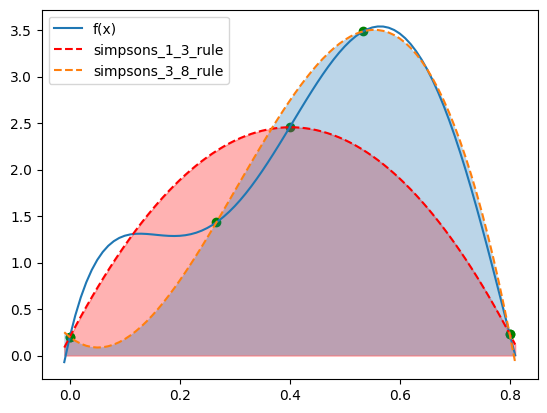

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math

def fun(x):
  return 0.2 + 25 * x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

def simpsons_1_3_rule(fun, a, b):
    return (b - a) / 6 * (fun(a) + 4 * fun((a + b) / 2) + fun(b))

def simpsons_3_8_rule(fun, a, b):
    a, b = min(a, b), max(a, b)
    h = (b - a) / 3
    return (3 * h / 8) * (fun(a) + 3 * fun(a + h) + 3 * fun(a + 2 * h) + fun(b))

array = np.arange(-0.01, 0.82, 0.01)

print("simpsons_1_3_rule :", simpsons_1_3_rule(fun, 0, 0.8))

plt.plot(array, fun(array), label="f(x)")
plt.scatter([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)], color='green')
plt.plot(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), '--', color='red', label='simpsons_1_3_rule')
plt.fill_between(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), color='red', alpha=0.3)

a, b, c, d = 0, 0.8/3, 0.8/3*2, 0.8
print("simpsons_3_8_rule : ", simpsons_3_8_rule(fun, a, d))

plt.plot(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), '--', label="simpsons_3_8_rule")
plt.scatter([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)], color='green')
plt.fill_between(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), alpha=0.3)

plt.legend()
plt.show()
